In [24]:
from ga4stpg.util import STEIN_B
from ga4stpg.graph import ReaderORLibrary
from ga4stpg.graph.util import is_steiner_tree

from ga4stpg.tree.evaluation import EvaluateTreeGraph
from ga4stpg.tree.mstcrossover import CrossoverPrimUnion
from ga4stpg.tree.generate import GenerateBasedRandomWalk, GenerateBasedPrimRST

In [25]:
from os import path

import seaborn as sns
from matplotlib import pyplot as plt 
import numpy as np
import pandas as pd
from scipy import stats

import config

In [26]:
STEIN_B

[('steinb1.txt', 82),
 ('steinb2.txt', 83),
 ('steinb3.txt', 138),
 ('steinb4.txt', 59),
 ('steinb5.txt', 61),
 ('steinb6.txt', 122),
 ('steinb7.txt', 111),
 ('steinb8.txt', 104),
 ('steinb9.txt', 220),
 ('steinb10.txt', 86),
 ('steinb11.txt', 88),
 ('steinb12.txt', 174),
 ('steinb13.txt', 165),
 ('steinb14.txt', 235),
 ('steinb15.txt', 318),
 ('steinb16.txt', 127),
 ('steinb17.txt', 131),
 ('steinb18.txt', 218)]

In [27]:
INDEX = 4

instance_problem = STEIN_B[INDEX][0]
filename = path.join(config.dataset_directory, instance_problem)
stpg = ReaderORLibrary().parser(filename)

print("STPG information", '\n', 10*'- ','\n')
print('Instance: ', stpg.name)
print('Best Known cost: ', STEIN_B[INDEX][1])
print("Nro. Node:", stpg.nro_nodes)
print("Nro. Edges:", stpg.nro_edges)
print("Nro. Terminals:", stpg.nro_terminals)
print("Terminals: \n", stpg.terminals)

STPG information 
 - - - - - - - - - -  

Instance:  B5
Best Known cost:  61
Nro. Node: 50
Nro. Edges: 100
Nro. Terminals: 13
Terminals: 
 {3, 35, 5, 37, 7, 39, 13, 15, 16, 20, 23, 24, 31}


In [28]:
generator = GenerateBasedPrimRST(stpg)
evaluator = EvaluateTreeGraph(stpg)
crossover = CrossoverPrimUnion(stpg)

In [29]:
population = [generator() for _ in range(100)]

In [30]:
pop_cost = list()

for p in population:
    cost, partition = evaluator(p)
    pop_cost.append(cost)


In [31]:
df = pd.DataFrame(data=pop_cost, columns=["first"])

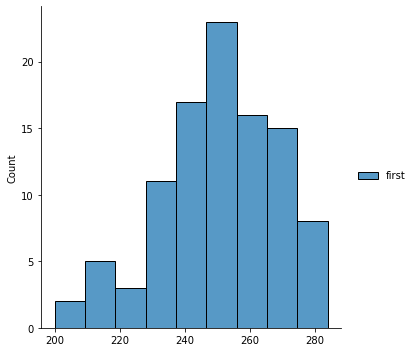

In [32]:
sns.displot(df)

In [33]:
from itertools import combinations

In [34]:
selector = combinations(population, 2)

In [35]:
next(selector)

(<ga4stpg.graph.graph.UndirectedGraph at 0x1dd1a1409c8>,
 <ga4stpg.graph.graph.UndirectedGraph at 0x1dd1a140e48>)

In [36]:
a, b = next(selector)
print(evaluator(a))
print(evaluator(b))

child = crossover(a, b)

evaluator(child)

(247, 1)
(265, 1)


(214, 1)

In [37]:
is_steiner_tree(child,stpg)

(False,
 {'has_cycle': False,
  'all_terminals_in': True,
  'all_leaves_are_terminals': False,
  'all_edges_are_reliable': True,
  'graph_is_connected': True})

In [38]:
child.edges

defaultdict(set,
            {23: {10, 31, 34, 43},
             43: {23},
             10: {13, 23},
             13: {10},
             34: {3, 23},
             3: {20, 34},
             20: {3, 39, 47, 49},
             39: {20},
             49: {5, 20, 42},
             47: {20, 22},
             42: {6, 16, 49},
             6: {12, 42, 46, 50},
             50: {6},
             5: {25, 49},
             25: {5, 14, 15, 30},
             30: {11, 25, 28, 32},
             32: {30},
             11: {30, 44},
             16: {2, 42},
             44: {11, 19},
             19: {44},
             46: {6, 7, 17},
             7: {46},
             28: {30},
             17: {21, 27, 46},
             27: {17, 48},
             48: {27},
             21: {1, 9, 17, 37},
             37: {8, 21},
             1: {18, 21, 40},
             18: {1},
             9: {21},
             8: {37, 45},
             45: {8, 36, 38},
             36: {24, 45},
             38: {45},
        

In [39]:
%%time
selector = combinations(population, 2)
cost_children = list()
new_pop = list()

for _ in range(100):
    a, b = next(selector)
    child = crossover(a, b)
    _cost, _ = evaluator(child)
    cost_children.append(_cost)
    new_pop.append(child)

np.mean(cost_children), np.std(cost_children)

Wall time: 94.7 ms


(202.61, 10.234153604475555)

In [40]:
%%time
selector = combinations(new_pop, 2)
cost_children = list()
new_pop = list()

for _ in range(100):
    a, b = next(selector)
    child = crossover(a, b)
    _cost, _ = evaluator(child)
    cost_children.append(_cost)
    new_pop.append(child)

np.mean(cost_children), np.std(cost_children)

Wall time: 79.8 ms


(183.48, 8.24436777442637)

In [41]:
%%time
selector = combinations(new_pop, 2)
cost_children = list()
new_pop = list()

for _ in range(100):
    a, b = next(selector)
    child = crossover(a, b)
    _cost, _ = evaluator(child)
    cost_children.append(_cost)
    new_pop.append(child)

np.mean(cost_children), np.std(cost_children)

Wall time: 76.8 ms


(178.42, 6.965888313775926)

In [42]:
%%time
selector = combinations(new_pop, 2)
cost_children = list()
new_pop = list()

for _ in range(100):
    a, b = next(selector)
    child = crossover(a, b)
    _cost, _ = evaluator(child)
    cost_children.append(_cost)
    new_pop.append(child)

np.mean(cost_children), np.std(cost_children)

Wall time: 98.7 ms


(174.6, 3.937003937005905)

In [43]:
%%time
selector = combinations(new_pop, 2)
cost_children = list()
new_pop = list()

for _ in range(100):
    a, b = next(selector)
    child = crossover(a, b)
    _cost, _ = evaluator(child)
    cost_children.append(_cost)
    new_pop.append(child)

np.mean(cost_children), np.std(cost_children)

Wall time: 80.8 ms


(168.08, 0.9967948635501691)

In [44]:
%%time
selector = combinations(new_pop, 2)
cost_children = list()
new_pop = list()

for _ in range(100):
    a, b = next(selector)
    child = crossover(a, b)
    _cost, _ = evaluator(child)
    cost_children.append(_cost)
    new_pop.append(child)

np.mean(cost_children), np.std(cost_children)

Wall time: 86.1 ms


(168.06, 0.9981983770774225)

In [45]:
%%time
selector = combinations(new_pop, 2)
cost_children = list()
new_pop = list()

for _ in range(100):
    a, b = next(selector)
    child = crossover(a, b)
    _cost, _ = evaluator(child)
    cost_children.append(_cost)
    new_pop.append(child)

np.mean(cost_children), np.std(cost_children)

Wall time: 114 ms


(168.04, 0.9991996797437438)

In [46]:
%%time
selector = combinations(new_pop, 2)
cost_children = list()
new_pop = list()

for _ in range(100):
    a, b = next(selector)
    child = crossover(a, b)
    _cost, _ = evaluator(child)
    cost_children.append(_cost)
    new_pop.append(child)

np.mean(cost_children), np.std(cost_children)

Wall time: 73.8 ms


(167.0, 0.0)

In [47]:
is_steiner_tree(child, stpg)

(False,
 {'has_cycle': False,
  'all_terminals_in': True,
  'all_leaves_are_terminals': False,
  'all_edges_are_reliable': True,
  'graph_is_connected': True})